### Movie Genres Classification
- Predicting the genre of movie from just 1000 characters of the script
- Dataset Link: https://www.kaggle.com/c/moviegenres/overview

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('kaggle_movie_train.csv')
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [4]:
data.drop(columns= 'id', inplace= True)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [5]:
data.isna().any()

text     False
genre    False
dtype: bool

In [6]:
data['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [7]:
genre_mapping = {'other': 0, 'action': 1, 'romance': 2, 'horror': 3, 'sci-fi': 4, 'comedy': 5,'thriller': 6, 'drama': 7,'adventure': 8}
genre_mapping

{'other': 0,
 'action': 1,
 'romance': 2,
 'horror': 3,
 'sci-fi': 4,
 'comedy': 5,
 'thriller': 6,
 'drama': 7,
 'adventure': 8}

In [8]:
data['genre'] = data['genre'].map(genre_mapping)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",6
1,"t, summa cum laude and all. And I'm about to l...",5
2,"up Come, I have a surprise.... She takes him ...",7
3,ded by the two detectives. INT. JEFF'S APARTME...,6
4,"nd dismounts, just as the other children reach...",7


In [9]:
data['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

### Data Cleaning

In [10]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= data['text'][i])
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [ps.stem(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)


In [12]:
corpus[:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

### Checking what kind of words in each genre

In [14]:
genre_mapping

{'other': 0,
 'action': 1,
 'romance': 2,
 'horror': 3,
 'sci-fi': 4,
 'comedy': 5,
 'thriller': 6,
 'drama': 7,
 'adventure': 8}

In [23]:
scifi_words = []
romance_words = []
thriller_words = []

for i in list(data[data['genre']==4].index):
    scifi_words.append(corpus[i])

for i in list(data[data['genre']==2].index):
    romance_words.append(corpus[i])

for i in list(data[data['genre']==6].index):
    thriller_words.append(corpus[i])

scifi = ''
romance = ''
thriller = ''
for i in range(0, 3):
    scifi += scifi_words[i]
    romance += romance_words[i]
    thriller += thriller_words[i]

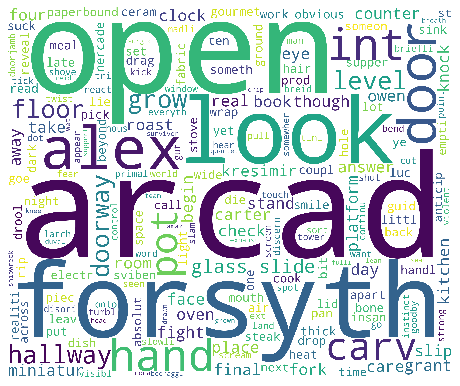

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=3000, height=2500).generate(scifi)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

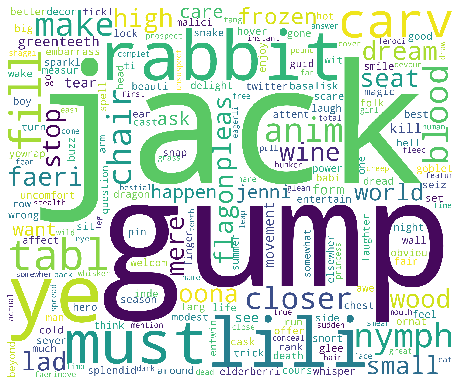

In [35]:
wc = WordCloud(background_color='white', width=3000, height=2500).generate(romance)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

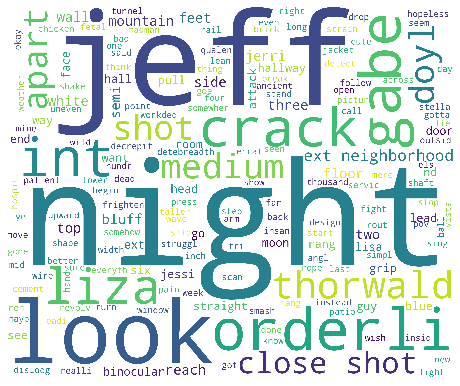

In [36]:
wc = WordCloud(background_color='white', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [37]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [39]:
y = data['genre'].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [41]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

In [43]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Accuracy score is: {}%".format(round(score_*100,2)))

Accuracy score is: 89.57%


### Predictions

In [45]:
X_test[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y_test[:5]

array([1, 7, 1, 6, 6], dtype=int64)

In [47]:
y_pred[:5]

array([1, 7, 1, 6, 6], dtype=int64)